In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('../data/balanced_classification_dataset.csv')
print(len(df))
df.head()
options = ["meniskus_urgent", "cruciate_urgent"] 
  
# selecting rows based on condition 
df = df[df['label'].isin(options)] 
df.head()

45257


,Unnamed: 0,patientid,sex,age,ANA,EXA,DIA_text,DIA_code,OP_text,OP_code,label,data
1,1,67.0,male,41.0,Seit mehreren Monaten Beschwerden re. Achilles...,Re. Achillessehne: Deutliche Auftreibung der A...,V.a.laterale Chondromalazie bei st.n. Außenmen...,M23.3,NaN,NaN,meniskus_urgent,Seit mehreren Monaten Beschwerden re. Achilles...
2,2,72.0,male,19.0,. .Gestern beim Training stechende Schmerzen l...,Klinischer Befund des Oberschenkels li.deutl.V...,Z.n.arthroskopischer Chirurgie des Kniegelenkes.,M23.3,NaN,NaN,meniskus_urgent,. .Gestern beim Training stechende Schmerzen l...
3,3,72.0,male,23.0,beide Knie Schmerzen bei Treppe steigen oder L...,bd. Knie: frei Bewegl.; Patella o.B.; keine MZ...,Z.n.IM-Teilresektion re.,S83.2,NaN,NaN,meniskus_urgent,beide Knie Schmerzen bei Treppe steigen oder L...
5,5,93.0,male,18.0,(08.39 Uhr) Seit 2 Jahren Knieschmerzen an der...,Klinischer Befund des Kniegelenks li.: Kontur ...,Akuter Meniskusriss,S83.2,NaN,NaN,meniskus_urgent,(08.39 Uhr) Seit 2 Jahren Knieschmerzen an der...
6,6,94.0,female,62.0,(09.24 Uhr) Seit mehreren Monaten Hüftbeschwer...,Klinischer Befund des Hüftgelenks li.: pos. Tr...,Sonstige Meniskusschädigungen: Hinterhorn des ...,M23.3,NaN,NaN,meniskus_urgent,(09.24 Uhr) Seit mehreren Monaten Hüftbeschwer...


# From Test 3  

In [ ]:


data_label = "data"
predict_label = "label"

df = pd.read_csv('../data/balanced_classification_dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
options = ["meniskus_urgent", "cruciate_urgent"] 
df = df[df['label'].isin(options)] 
# Split data into training and temporary data (the remaining 40%)
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df[predict_label])

# Split the temporary data into validation and test sets (each 50% of temporary, thus 20% of total each)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df[predict_label])

# Check the size of each set
print("Training set size:", len(train_df))
print("Validation set size:", len(valid_df))
print("Test set size:", len(test_df))
# Prepare data for training
train_texts = train_df[data_label]
valid_texts = valid_df[data_label]
test_texts = test_df[data_label]

# Tokenize texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)  # Only fit on train data
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_texts)
valid_sequences = tokenizer.texts_to_sequences(valid_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)
max_length = max(len(sequence) for sequence in train_sequences) + 30
# Padding sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')


# Initialize the label encoder
all_labels = pd.concat([train_df[predict_label], valid_df[predict_label], test_df[predict_label]])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)
# Fit label encoder and return encoded labels as integers
train_labels_enc = label_encoder.transform(train_df[predict_label])
valid_labels_enc = label_encoder.transform(valid_df[predict_label])
test_labels_enc = label_encoder.transform(test_df[predict_label])

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels_enc)
valid_labels = to_categorical(valid_labels_enc)
test_labels = to_categorical(test_labels_enc)

label_counts = train_df[predict_label].value_counts()
num_classes = len(train_df[predict_label].unique())
print(label_counts)
# Plot the distribution of labels
plt.figure(figsize=(3, 2))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_enc), y=train_labels_enc)
class_weights = { np.unique(train_labels_enc)[i]: w for i,w in enumerate(class_weights) }
print(class_weights)
sample_weights = np.array([class_weights[label] for label in train_labels_enc])
# Count each class
values, counts = np.unique(df[predict_label], return_counts=True)
class_distribution = dict(zip(values, counts))
print("Original Class Distribution:", class_distribution)

# Encode the keys of class_distribution
encoded_keys = label_encoder.transform(list(class_distribution.keys()))
encoded_class_distribution = dict(zip(encoded_keys, counts))
print("Encoded Class Distribution:", encoded_class_distribution)

In [3]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Initialize RAKE
r = Rake(include_repeated_phrases=False, min_length=2)


# Get the ranked phrases
def extract_keywords(text):
    r.extract_keywords_from_text(text)
    keywords = r.get_ranked_phrases()  # Returns a list of extracted keywords
    return keywords
# Applying the function to the DataFrame
df['keywords'] = df['data'].apply(extract_keywords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliankraus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliankraus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, Concatenate, AdditiveAttention
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import AdditiveAttention
# Split data into training and temporary data (the remaining 40%)
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['label'])

# Split the temporary data into validation and test sets (each 50% of temporary, thus 20% of total each)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Check the size of each set
print("Training set size:", len(train_df))
print("Validation set size:", len(valid_df))
print("Test set size:", len(test_df))

# Prepare data for training
train_texts = train_df['keywords']
valid_texts = valid_df['keywords']
test_texts = test_df['keywords']

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels as integers
train_labels_enc = label_encoder.fit_transform(train_df[label_column])
valid_labels_enc = label_encoder.transform(valid_df[label_column])
test_labels_enc = label_encoder.transform(test_df[label_column])

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels_enc)
valid_labels = to_categorical(valid_labels_enc)
test_labels = to_categorical(test_labels_enc)
print(f'Average class probability in training set:   {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {valid_labels.mean():.4f}')
print(f'Average class probability in test set:       {test_labels.mean():.4f}')

# Tokenize texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)  # Only fit on train data
train_sequences = tokenizer.texts_to_sequences(train_texts)
valid_sequences = tokenizer.texts_to_sequences(valid_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)
max_length = max(len(sequence) for sequence in train_sequences) + 30
print(max_length)
# Padding sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

Training set size: 14946
Validation set size: 4982
Test set size: 4982
Average class probability in training set:   0.5000
Average class probability in validation set: 0.5000
Average class probability in test set:       0.5000
87


In [5]:



# Preprocessing
label_column = 'label'
cols = ['ANA', 'EXA', 'age', 'sex']
df['data'] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Balance the dataset (example, replace with actual balancing logic)
balanced_df = df # Replace with actual balancing logic
texts = balanced_df['data']

# Encode labels
encoder = OneHotEncoder()
labels = encoder.fit_transform(df[label_column].to_frame()).toarray()
num_classes = len(encoder.categories_[0])



import numpy as np



# Compute class weights using non-categorical labels

# Define model parameters
embedding_dim = 300  # Dimension of the embedding vectors
lstm_units = 64  # Number of LSTM units
conv_filters = 128  # Number of convolutional filters
kernel_size = 5  # Size of the convolution kernel

# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input')
word_index = tokenizer.word_index

# Embedding layer
embedding = Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, trainable=True)(input_text)

# Convolutional layer
conv_layer = Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu', padding='same')(embedding)

# Two Bidirectional LSTM layers with recurrent dropout
lstm_layer = LSTM(lstm_units, return_sequences=True, dropout=0.2, recurrent_dropout=0)(conv_layer)
lstm_layer = Dropout(0.5)(lstm_layer)
lstm_layer = LSTM(lstm_units, dropout=0.2, recurrent_dropout=0)(lstm_layer)
lstm_layer = Dropout(0.5)(lstm_layer)

query = lstm_layer
value = lstm_layer

# Attention layer
attention_out = AdditiveAttention()([query, value, value])  # The layer outputs a tensor of the same shape as query and value

# We might want to combine the original sequence and the attention-enhanced features
combined_layer = Concatenate()([lstm_layer, attention_out])
# Dense layer
dense_layer = Dense(64, activation='relu')(combined_layer)
dense_layer = Dropout(0.5)(dense_layer)

# Output layer
output = Dense(num_classes, activation='softmax')(dense_layer)

# Define the model
model = Model(inputs=input_text, outputs=output)

optimizer = Adam(learning_rate=0.003)  # Example: 0.001 is a commonly used starting value

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model



{0: 1.9250386398763524, 1: 0.6754338394793926}
Class Distribution: {'cruciate_urgent': 6470, 'meniskus_urgent': 18440}


2024-07-19 11:56:01.680003: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-07-19 11:56:01.680026: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-07-19 11:56:01.680032: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-07-19 11:56:01.680045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-19 11:56:01.680059: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 87)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 87, 300)   │ 31,652,100 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 87, 128)   │    192,128 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 87, 64)    │     49,408 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 87, 64)    │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     33,024 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ additive_attention  │ (None, 64)        │         64 │ dropout_1[0][0],  │
│ (AdditiveAttention) │                   │            │ dropout_1[0][0],  │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ additive_attenti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 2)         │        130 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 31,935,110 (121.82 MB)

 Trainable params: 31,935,110 (121.82 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_padded, train_labels, epochs=10, batch_size=32,
                    validation_data=(valid_padded, valid_labels),
                    class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/10


2024-07-19 11:56:05.293866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


468/468 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.5194 - loss: 0.7033 - val_accuracy: 0.3756 - val_loss: 0.6938
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.5219 - loss: 0.6936 - val_accuracy: 0.7238 - val_loss: 0.6922
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.5334 - loss: 0.6961 - val_accuracy: 0.2597 - val_loss: 0.7008
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.4441 - loss: 0.6935 - val_accuracy: 0.2597 - val_loss: 0.7032
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.5066 - loss: 0.6901 - val_accuracy: 0.7403 - val_loss: 0.6896
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.5188 - loss: 0.6944 - val_accuracy: 0.2597 - val_loss: 0.6934
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.4365 - loss: 0.6971 - val_accuracy: 0.7403 - val_loss: 0.6882
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.3475 - loss: 0.7002 - val_accurac

156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Classification Report:
                 precision    recall  f1-score   support

cruciate_urgent       0.00      0.00      0.00      1294
meniskus_urgent       0.74      1.00      0.85      3688

       accuracy                           0.74      4982
      macro avg       0.37      0.50      0.43      4982
   weighted avg       0.55      0.74      0.63      4982



/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

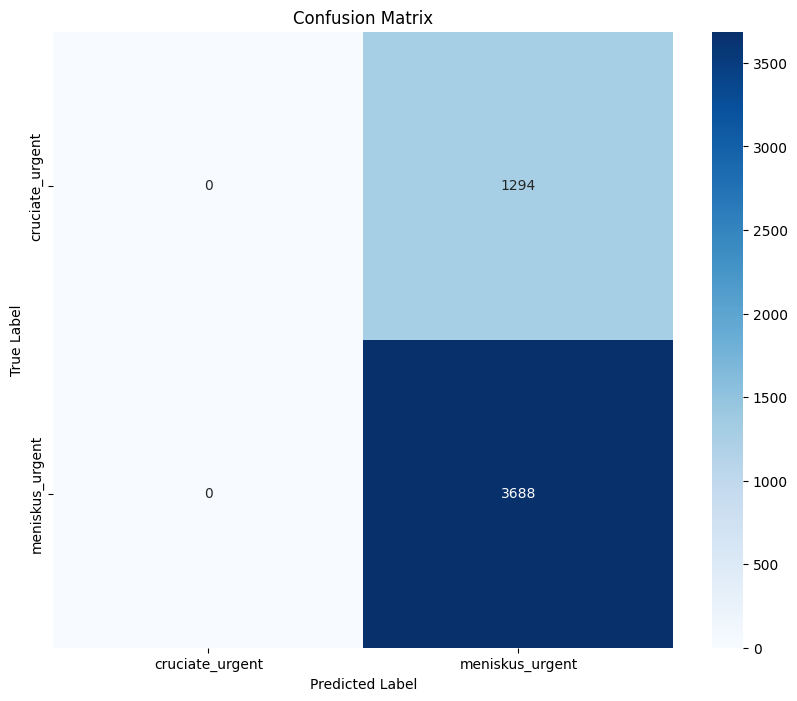

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the test data
test_predictions = model.predict(test_padded)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Convert numerical classes back to original labels
test_predicted_labels = label_encoder.inverse_transform(test_predicted_classes)
test_true_labels = label_encoder.inverse_transform(test_true_classes)

# Classification report including precision, recall, and F1-score
print("Classification Report:")
print(classification_report(test_true_labels, test_predicted_labels))

# Confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [7]:



# Preprocessing
label_column = 'label'
cols = ['ANA', 'EXA', 'age', 'sex']
df['data'] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Balance the dataset (example, replace with actual balancing logic)
balanced_df = df # Replace with actual balancing logic
texts = balanced_df['data']

# Encode labels
encoder = OneHotEncoder()
labels = encoder.fit_transform(df[label_column].to_frame()).toarray()
num_classes = len(encoder.categories_[0])



import numpy as np



# Compute class weights using non-categorical labels
original_labels = df[label_column].to_numpy()
class_weights = compute_class_weight('balanced', classes=np.unique(original_labels), y=original_labels)
class_weights = dict(enumerate(class_weights))
print(class_weights)
# Count each class
values, counts = np.unique(original_labels, return_counts=True)
class_distribution = dict(zip(values, counts))
print("Class Distribution:", class_distribution)
# Define model parameters
embedding_dim = 300  # Dimension of the embedding vectors
lstm_units = 64  # Number of LSTM units
conv_filters = 128  # Number of convolutional filters
kernel_size = 5  # Size of the convolution kernel

# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input')
word_index = tokenizer.word_index

# Embedding layer
embedding = Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, trainable=True)(input_text)

# Convolutional layer
conv_layer = Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu', padding='same')(embedding)

# Two Bidirectional LSTM layers with recurrent dropout
lstm_layer = LSTM(lstm_units, return_sequences=True, dropout=0.2, recurrent_dropout=0)(conv_layer)
lstm_layer = Dropout(0.5)(lstm_layer)
lstm_layer = LSTM(lstm_units, dropout=0.2, recurrent_dropout=0)(lstm_layer)
lstm_layer = Dropout(0.5)(lstm_layer)

query = lstm_layer
value = lstm_layer

# Attention layer
attention_out = AdditiveAttention()([query, value, value])  # The layer outputs a tensor of the same shape as query and value

# We might want to combine the original sequence and the attention-enhanced features
combined_layer = Concatenate()([lstm_layer, attention_out])
# Dense layer
dense_layer = Dense(64, activation='relu')(combined_layer)
dense_layer = Dropout(0.5)(dense_layer)

# Output layer
output = Dense(num_classes, activation='softmax')(dense_layer)

# Define the model
model = Model(inputs=input_text, outputs=output)

optimizer = Adam(learning_rate=0.003)  # Example: 0.001 is a commonly used starting value

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', weighted_metrics=['accuracy'])

# Summary of the model
model.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model



{0: 1.9250386398763524, 1: 0.6754338394793926}
Class Distribution: {'cruciate_urgent': 6470, 'meniskus_urgent': 18440}


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 87)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 87, 300)   │ 31,652,100 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 87, 128)   │    192,128 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 87, 64)    │     49,408 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 87, 64)    │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     33,024 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ additive_attention… │ (None, 64)        │         64 │ dropout_4[0][0],  │
│ (AdditiveAttention) │                   │            │ dropout_4[0][0],  │
│                     │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ dropout_4[0][0],  │
│ (Concatenate)       │                   │            │ additive_attenti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 2)         │        130 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 31,935,110 (121.82 MB)

 Trainable params: 31,935,110 (121.82 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(train_padded, train_labels, epochs=10, batch_size=8,
                    validation_data=(valid_padded, valid_labels),
                    class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 174s 91ms/step - accuracy: 0.4995 - loss: 0.7105 - val_accuracy: 0.7403 - val_loss: 0.6823
Epoch 2/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 167s 89ms/step - accuracy: 0.4923 - loss: 0.6994 - val_accuracy: 0.7403 - val_loss: 0.6761
Epoch 3/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 176s 94ms/step - accuracy: 0.4863 - loss: 0.6957 - val_accuracy: 0.7403 - val_loss: 0.6702
Epoch 4/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 502s 269ms/step - accuracy: 0.4998 - loss: 0.6951 - val_accuracy: 0.2597 - val_loss: 0.6937
Epoch 5/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 170s 91ms/step - accuracy: 0.5180 - loss: 0.7008 - val_accuracy: 0.7403 - val_loss: 0.6919
Epoch 6/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 168s 90ms/step - accuracy: 0.5069 - loss: 0.6924 - val_accuracy: 0.7403 - val_loss: 0.6898


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the test data
test_predictions = model.predict(test_padded)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Classification report including precision, recall, and F1-score
print(classification_report(test_true_classes, test_predicted_classes))

# Confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1294
           1       0.74      1.00      0.85      3688

    accuracy                           0.74      4982
   macro avg       0.37      0.50      0.43      4982
weighted avg       0.55      0.74      0.63      4982



/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>